In [280]:
import pandas as pd # import panda library as pd for data manipulation
import matplotlib.pyplot as plt# import matplotlib as plt for data visualitzation 
from matplotlib import style
from scipy import stats # import scipy as stats for statistic calculation
import numpy as np # import nump as np 
from pandas_datareader import wb

In [281]:
agricultural_land = 'AG.LND.AGRI.ZS'
electric_power_comsumption = 'EG.USE.ELEC.KH.PC'
population_growth = 'SP.POP.GROW'
urban_population = 'SP.URB.TOTL.IN.ZS'

In [282]:
countries = ['AUS','PAK','BEL','CHN','BRA','IRN','CAN','IND','USA','AFG','UK']

In [283]:
def read_worldbank(filename: str):
    # Read the file into a pandas dataframe
    dataframe = pd.read_csv(filename)
    
    # Transpose the dataframe
    df_transposed = dataframe.transpose()
    
    # Populate the header of the transposed dataframe with the header information 
   
    # silice the dataframe to get the year as columns
    df_transposed.columns = df_transposed.iloc[1]
    # As year is now columns so we don't need it as rows
    df_transposed_year = df_transposed[0:].drop('year')
    
    # silice the dataframe to get the country as columns
    df_transposed.columns = df_transposed.iloc[0]
    
    # As country is now columns so we don't need it as rows
    df_transposed_country = df_transposed[0:].drop('country')
    
    return dataframe, df_transposed_country, df_transposed_year


In [284]:
# Passing filename to real_worldbank function 
original_df, df_by_country, df_by_year = read_worldbank_data('wb_climatechange.csv')

In [285]:
# show the first 10 row
original_df.head()

,country,year,access_to_electricity,agricultural_land,co2_emission,arable_land,electric_power_comsumption,forest_area,population_growth,urban_population,GDP
0,Afghanistan,2020,97.699997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2019,97.699997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2018,96.616135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2017,97.699997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2016,97.699997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [286]:
# show the first 10 row
df_by_country.head()

country,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,...,South Africa,South Africa,South Africa,South Africa,South Africa,South Africa,South Africa,South Africa,South Africa,South Africa
year,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
access_to_electricity,97.699997,97.699997,96.616135,97.699997,97.699997,71.5,89.5,68.290649,69.099998,43.222019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
agricultural_land,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
co2_emission,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arable_land,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [287]:
# show the first 5 row
df_by_year.head()

year,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
country,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,...,South Africa,South Africa,South Africa,South Africa,South Africa,South Africa,South Africa,South Africa,South Africa,South Africa
access_to_electricity,97.699997,97.699997,96.616135,97.699997,97.699997,71.5,89.5,68.290649,69.099998,43.222019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
agricultural_land,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
co2_emission,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arable_land,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
electric_power_comsumption,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
forest_area,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
population_growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
urban_population,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GDP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.846399,3.03418,3.265895,3.416588,3.121585,3.755448,3.422575,3.14921,3.743505,3.777056


In [288]:
# we want to see countries power comsumption over specfic years
# we need to filter our original data frame to get specific fields
data = original_df[['country','year','electric_power_comsumption']]

# drop the null values present in the dataset
data= data.dropna()


In [289]:
year_1990 = data[data['year'] == 1990] # filter data related to 1990 
year_1995 = data[data['year'] == 1995] # filter data related to 1995 
year_2000 = data[data['year'] == 2000] # filter data related to 2000 
year_2005 = data[data['year'] == 2005] # filter data related to 2005 
year_2010 = data[data['year'] == 2010] # filter data related to 2010 

In [290]:
x = np.arange(11) # make 11 groups for 11 countries 

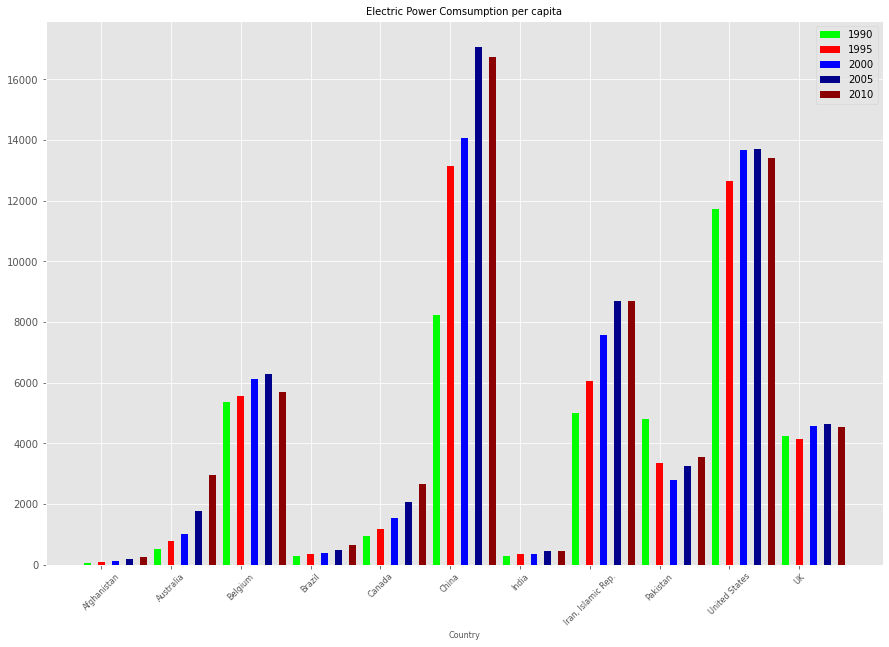

In [291]:
style.use('ggplot')

# set fig size
plt.figure(figsize=(15,10))

# set width of bars
barWidth = 0.1 

# plot bar charts
plt.bar(x,year_1990['electric_power_comsumption'],color='lime', width=barWidth, label='1990')
plt.bar(x+0.2,year_1995['electric_power_comsumption'],color='red',width=barWidth, label='1995')
plt.bar(x+0.4,year_2000['electric_power_comsumption'],color='blue',width=barWidth, label='2000')
plt.bar(x+0.6,year_2005['electric_power_comsumption'],color='darkblue',width=barWidth, label='2005')
plt.bar(x+0.8,year_2010['electric_power_comsumption'],color='darkred',width=barWidth, label='2010')

# show the legends on the plot
plt.legend()

# set the x-axis label
plt.xlabel('Country',fontsize=8)

# add title to the plot 
plt.title("Electric Power Comsumption per capita",fontsize=10)

# add countries names to the 11 groups on the x-axis
plt.xticks(x+0.2,('Afghanistan', 'Australia', 'Belgium', 'Brazil', 'Canada', 'China',
       'India', 'Iran, Islamic Rep.', 'Pakistan', 'United States','UK'),fontsize=8,rotation = 45)

# show the plot
plt.show()

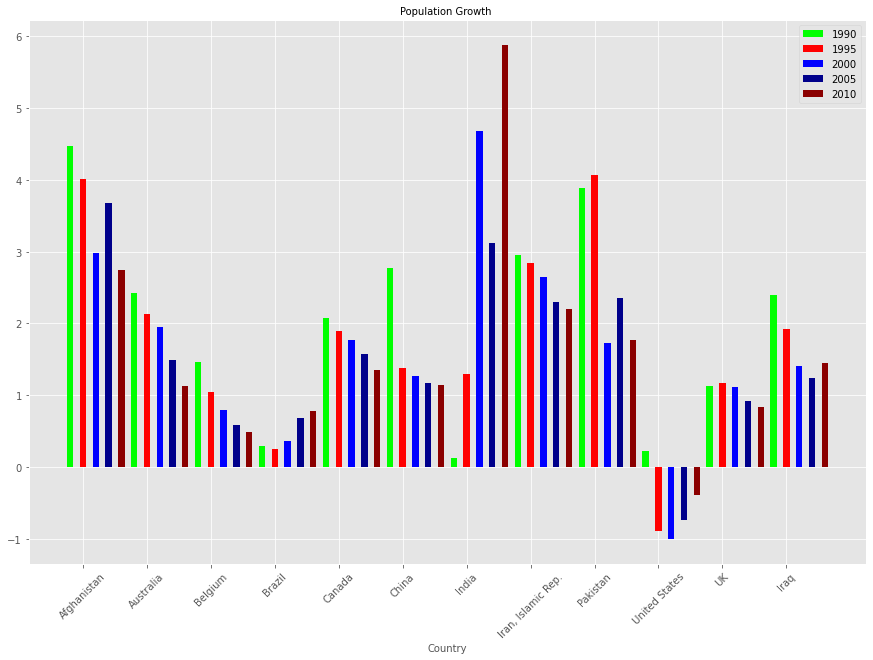

In [292]:
style.use('ggplot')

# set fig size
plt.figure(figsize=(15,10))

# set width of bars
barWidth = 0.1 

# plot bar charts
plt.bar(x_group,population_growth_year_1990['population_growth'],color='lime', width=barWidth, label='1990')
plt.bar(x_group+0.2,population_growth_year_1995['population_growth'],color='red',width=barWidth, label='1995')
plt.bar(x_group+0.4,population_growth_year_2000['population_growth'],color='blue',width=barWidth, label='2000')
plt.bar(x_group+0.6,population_growth_year_2005['population_growth'],color='darkblue',width=barWidth, label='2005')
plt.bar(x_group+0.8,population_growth_year_2010['population_growth'],color='darkred',width=barWidth, label='2010')

# show the legends on the plot
plt.legend()

# set the x-axis label
plt.xlabel('Country',fontsize=10)

# add title to the plot 
plt.title("Population Growth ",fontsize=10)

# add countries names to the 11 groups on the x-axis
plt.xticks(x_group+0.2,('Afghanistan', 'Australia', 'Belgium', 'Brazil', 'Canada', 'China',
       'India', 'Iran, Islamic Rep.', 'Pakistan', 'United States','UK','Iraq'),fontsize=10,rotation = 45)

# show the plot
plt.show()

In [293]:
mean = original_df[['country','year','electric_power_comsumption']]
m = mean[mean['country']=='China']
m['electric_power_comsumption']


62     NaN
63     NaN
64     NaN
65     NaN
66     NaN
        ..
3064   NaN
3065   NaN
3066   NaN
3067   NaN
3068   NaN
Name: electric_power_comsumption, Length: 279, dtype: float64

In [294]:
#calculate mean and median
mean = original_df['electric_power_comsumption'].mean()
median = original_df['electric_power_comsumption'].median()
print(f'The mean ECP is: {mean:.2f}')
print(f'The median ECP is: {median:.2f}')

#calculate mode
mode = stats.mode(original_df['electric_power_comsumption'])
print(f'The mode of ECP is: {mode[0][0]:.2f}')

#calculate standard deviation
std = original_df['electric_power_comsumption'].std()
print(f'The standard deviation of ECP is: {std:.2f}')

#calculate interquartile range
q75, q25 = np.percentile(original_df['electric_power_comsumption'], [75, 25])
iqr = q75 - q25
print(f'The interquartile range of ECP is: {iqr:.2f}')

#calculate skewness
skew = original_df['electric_power_comsumption'].skew()
print(f'The skewness of ECP is: {skew:.4f}')

The mean ECP is: 4743.50
The median ECP is: 3442.29
The mode of ECP is: nan
The standard deviation of ECP is: 4844.19
The interquartile range of ECP is: nan
The skewness of ECP is: 1.0974


In [295]:
original_df.describe()

,year,access_to_electricity,agricultural_land,co2_emission,arable_land,electric_power_comsumption,forest_area,population_growth,urban_population,GDP
count,3348.000000,324.000000,372.000000,3.600000e+02,370.000000,272.000000,370.000000,368.000000,372.000000,348.000000
mean,2005.000000,85.825323,50.500980,1.208393e+06,25.022655,4743.499773,14.338244,1.623436,59.263441,10.624062
std,8.945608,22.754296,24.188412,2.220035e+06,21.210110,4844.188497,9.539049,1.510110,26.780139,9.743245
min,1990.000000,1.613591,0.919220,7.300000e+02,0.224467,49.780969,0.187759,-3.104610,19.811000,0.030128
25%,1997.000000,72.657944,42.992971,4.966500e+04,10.136392,533.958760,5.757306,0.773468,32.375000,1.000543
50%,2005.000000,100.000000,57.007311,2.939050e+05,13.264443,3442.294428,14.560538,1.316307,63.009000,9.016800
75%,2013.000000,100.000000,71.309504,6.318650e+05,40.495927,6150.700099,22.079998,2.233105,79.918250,19.362685
max,2020.000000,100.000000,80.888475,1.070722e+07,72.643466,17765.805648,33.899723,8.790897,100.000000,38.627892


In [296]:
# we want to see countries population growth over the years
# we need to filter our original data frame to get specific fields
population_growth_data = original_df[['country','year','population_growth']]

# drop the null values present in the dataset
population_growth_data= population_growth_data.dropna()


In [297]:
india=original_df[original_df['country']== 'India'] #Assigning the values of specific countries for line chart
pakistan=original_df[original_df['country']== 'Pakistan']
united_states=original_df[original_df['country']== 'United States']
canada=original_df[original_df['country']== 'Canada']
belgium=original_df[original_df['country']== 'Belgium']
brazil=original_df[original_df['country']== 'Brazil']
iran=original_df[original_df['country']== 'Iran']
china=original_df[original_df['country']== 'China']
australia=original_df[original_df['country']== 'Australia']
united_kingdom=original_df[original_df['country']== 'United Kingdom']

In [298]:
population_growth_year_1990 = population_growth_data[population_growth_data['year'] == 1990] # filter data related to 1990 
population_growth_year_1995 =population_growth_data[population_growth_data['year'] == 1996] # filter data related to 1995 
population_growth_year_2000 = population_growth_data[population_growth_data['year'] == 2000] # filter data related to 2000 
population_growth_year_2005 = population_growth_data[population_growth_data['year'] == 2005] # filter data related to 2005 
population_growth_year_2010 = population_growth_data[population_growth_data['year'] == 2010] # filter data related to 2010 

[]

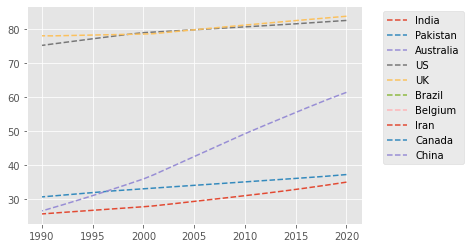

In [299]:
plt.plot(india.year, india.urban_population, label="India", linestyle="--" ) #use the filtered data for line chart to compare the data
plt.plot(pakistan.year, pakistan.urban_population, label="Pakistan", linestyle="--" )
plt.plot(australia.year, australia.urban_population, label="Australia", linestyle="--" )
plt.plot(united_states.year, united_states.urban_population, label="US", linestyle="--" )
plt.plot(united_kingdom.year, united_kingdom.urban_population, label="UK", linestyle="--" )
plt.plot(brazil.year, brazil.urban_population, label="Brazil", linestyle="--" )
plt.plot(belgium.year, belgium.urban_population, label="Belgium", linestyle="--" )
plt.plot(iran.year, iran.urban_population, label="Iran", linestyle="--" )
plt.plot(canada.year, canada.urban_population, label="Canada", linestyle="--" )
plt.plot(china.year, china.urban_population, label="China", linestyle="--" )
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left') #set the lagend outside the boundries of line chart for visibility of line chart
plt.plot()

[]

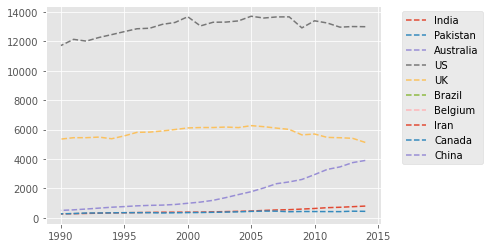

In [300]:
plt.plot(india.year, india.electric_power_comsumption, label="India", linestyle="--" )
plt.plot(pakistan.year, pakistan.electric_power_comsumption, label="Pakistan", linestyle="--" )
plt.plot(australia.year, australia.electric_power_comsumption, label="Australia", linestyle="--" )
plt.plot(united_states.year, united_states.electric_power_comsumption, label="US", linestyle="--" )
plt.plot(united_kingdom.year, united_kingdom.electric_power_comsumption, label="UK", linestyle="--" )
plt.plot(brazil.year, brazil.electric_power_comsumption, label="Brazil", linestyle="--" )
plt.plot(belgium.year, belgium.electric_power_comsumption, label="Belgium", linestyle="--" )
plt.plot(iran.year, iran.electric_power_comsumption, label="Iran", linestyle="--" )
plt.plot(canada.year, canada.electric_power_comsumption, label="Canada", linestyle="--" )
plt.plot(china.year, china.electric_power_comsumption, label="China", linestyle="--" )
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')  #set the lagend outside the boundries of line chart for visibility of line chart
plt.plot()

In [301]:
x_group = np.arange(12) # make 12 groups for 12 countries 

In [302]:
# we want to see countries population growth over the years
# we need to filter our original data frame to get specific fields
agricultural_land_data = original_df[['country','year','agricultural_land']]

# drop the null values present in the dataset
agricultural_land_data= agricultural_land_data.dropna()

In [303]:
# we want to see countries population growth over the years
# we need to filter our original data frame to get specific fields
urban_population_data = original_df[['country','year','urban_population']]

# drop the null values present in the dataset
urban_population_data= urban_population_data.dropna()

In [304]:
corr1_data=pd.merge(data, population_growth_data,  on=['country','year']) #to filter out the null values without loss of data for every feature sepratly
corr2_data=pd.merge(corr1_data, agricultural_land_data,  on=['country','year'])
corr_data=pd.merge(corr2_data, urban_population_data,  on=['country','year'])
corr_data=corr_data.drop(['year'], axis=1)
corr_metrix=corr_data.corr() #finding the correlation metrix
corr_metrix

,electric_power_comsumption,population_growth,agricultural_land,urban_population
electric_power_comsumption,1.000000,0.274259,-0.503351,0.804949
population_growth,0.274259,1.000000,-0.504874,0.103012
agricultural_land,-0.503351,-0.504874,1.000000,-0.597701
urban_population,0.804949,0.103012,-0.597701,1.000000


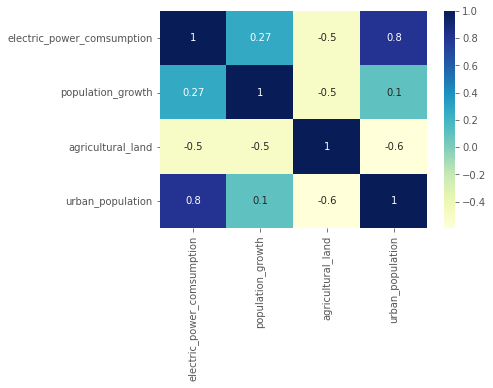

In [305]:
sns.heatmap(corr_metrix, cmap="YlGnBu", annot=True) #draw heat map using seaborn

[Text(0.5, 1.0, 'China')]

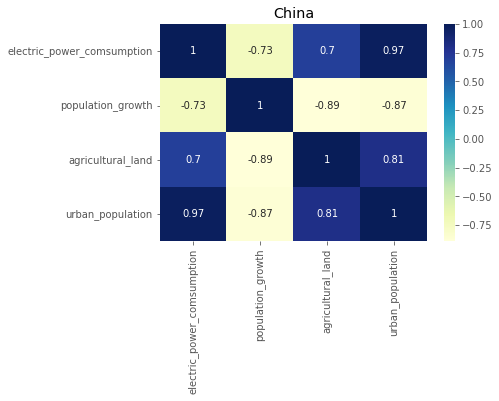

In [306]:
import seaborn as sns
sns.heatmap(corr_data[corr_data['country'] == 'China'].corr(), cmap="YlGnBu", annot=True).set(
    title="China")

[Text(0.5, 1.0, 'Pakistan')]

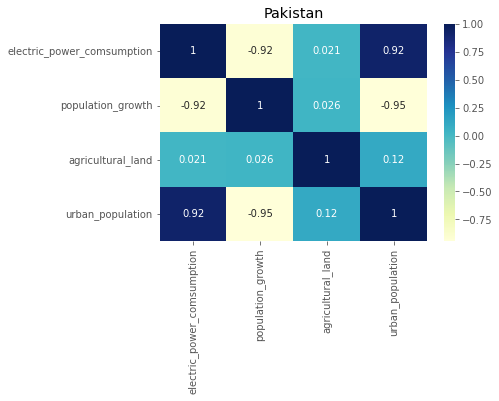

In [307]:
sns.heatmap(corr_data[corr_data['country'] == 'Pakistan'].corr(), cmap="YlGnBu", annot=True).set(
    title="Pakistan") #heatmap for china for analysis

[Text(0.5, 1.0, 'United States')]

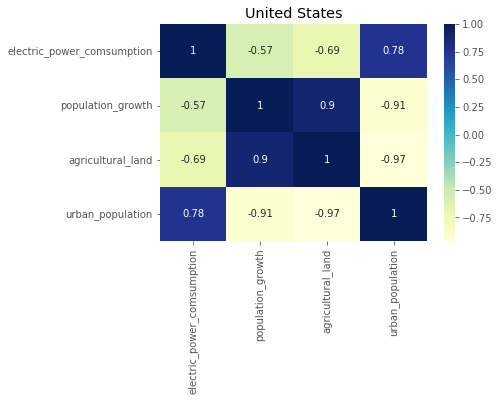

In [308]:
sns.heatmap(corr_data[corr_data['country'] == 'United States'].corr(), cmap="YlGnBu", annot=True).set(
    title="United States") #heatmap for united states